# Madrid Train Bombing Network Analytics

FOUR kinds of ties linking the individuals involved:
1.   Trust-friendship (contact, kinship, links in the telephone center).
2.   Ties to Al Qaeda and to Osama Bin Laden.
3.   Co-participation in training camps or wars.
4.   Co-participation in previous terrorist attacks (Sept 11, Casablanca).

These four were added together providing a *“strength of connection”* index
that ranges from 1 to 4. 

### Hint

For instance:
* Flush out the most dangerous terrorists;
  * Explain the concept adopted as “most dangerous”
* Detect the most cohesive groups of terrorists;
  * Detect the most influencial terrorist within each group


- Try also **edge_betweenness**


### Import packages and data


In [1]:
# Networks
import igraph as ig
import louvain

# Computation
import numpy as np
np.random.seed(0)
import scipy
import random
random.seed(0)

# Data
import pandas as pd
import csv

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

import sys

import plotly
import plotly.plotly as py

In [2]:
g = ig.Graph.Read_Ncol("data/madrid-edges.dat", names=True)
g["name"] = "g"

names = open("data/madrid-names.dat")
lines = names.read().split('\n')

for i in range(len(lines)):
    lines[i] = lines[i].replace('"', '')
    
for i in range(len(g.vs)):
    g.vs[i]["name"] = lines[int(g.vs[i]["name"])-1]
    
g.vs["label"] = g.vs["name"]
    
print(g)

IGRAPH DNW- 64 486 -- g
+ attr: name (g), label (v), name (v), weight (e)
+ edges (vertex names):
           Jamal Zougam -> Mohamed Bekkali, Mohamed Chaoui, Vinay Kholy,
Suresh Kumar, Mohamed Chedadi, Imad Eddin Barakat, Abdelaziz Benyaich, Abu
Abderrahame, Amer Azizi, Abu Musad Alsakaoui, Mohamed Atta, Ramzi Binalshibh,
Mohamed Belfatmi, Said Bahaji, Galeb Kalaje, Abderrahim Zbakh, Naima Oulad
Akcha, Abdelkarim el Mejjati, Basel Ghayoun, S B Abdelmajid Fakhet, Jamal
Ahmidan, Hamid Ahmidan, Abdeluahid Berrak, Said Berrak, Otman El Gnaut, El
Hemir, OM. Othman Abu Qutada, Shakur, Mohamed El Egipcio
        Mohamed Bekkali -> Jamal Zougam, Mohamed Chaoui
         Mohamed Chaoui -> Jamal Zougam, Mohamed Bekkali, Vinay Kholy, Suresh
Kumar, Imad Eddin Barakat, Abdelaziz Benyaich, Abu Abderrahame, Amer Azizi,
Abu Musad Alsakaoui, Mohamed Atta, Ramzi Binalshibh, Mohamed Belfatmi, Said
Bahaji, Galeb Kalaje, Abderrahim Zbakh, Naima Oulad Akcha, Abdelkarim el
Mejjati, Basel Ghayoun, S B Abdelmaj

### General analysis

In [3]:
n = g.vcount()
m = g.ecount()
print('{0} nodes, {1} edges'.format(n, m))

64 nodes, 486 edges


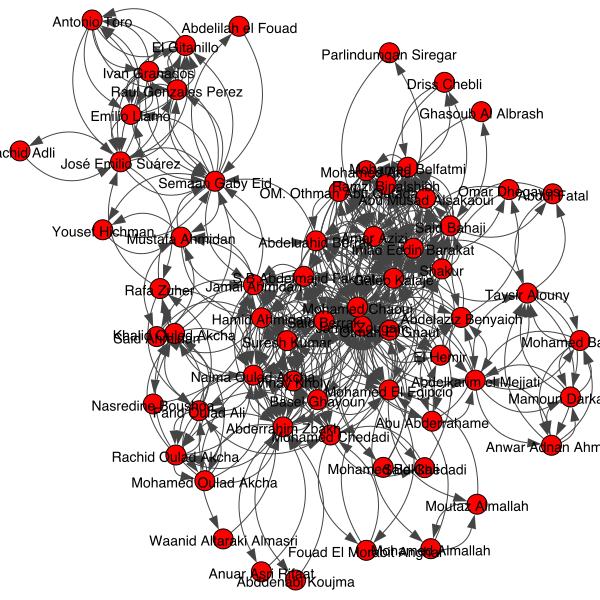

In [4]:
ig.plot(g)

## Centrality Analitycs



In [5]:
def nodes_bound(graph, threshold, measure):
    label = graph.vs["label"]
    measure_list = list()
    nodes = list()
    
    directory_name = 'out/' + str(graph["name"]) + '/' + measure + '.npy'
    
    if measure == 'closeness':
        measure_list = graph.closeness()
    elif measure == 'betweenness':
        measure_list =  graph.betweenness()
    elif measure == 'pagerank':
        measure_list =  graph.pagerank()
    elif measure == 'degree':
        measure_list =  graph.degree()
    elif measure == 'eigenvector_centrality':
        measure_list = graph.evcent()
    else:
        print('Function not available.')
    
    np.save(directory_name, measure_list)
    
    for i in range (len(measure_list)):
        if measure_list[i] >= threshold:
            nodes.append((label[i], round(measure_list[i], 3)))
            
    sorted_nodes = sorted(nodes, key = lambda x: float(x[1]))
    
    print('Vertex with the highest ', measure, ':')
    return sorted_nodes

### Shortest path 

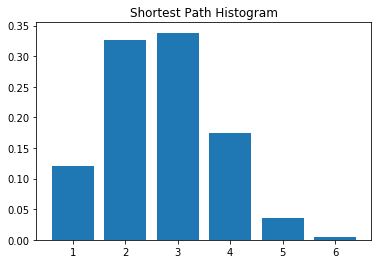

In [6]:
hist = g.path_length_hist(directed=True)

bins = []
values = []

for bin in hist.bins():
    values.append(bin[2])
    bins.append(bin[0])

bins = np.array(bins)
bins = bins.astype(int)
values = np.array(values)

values = values / np.sum(values)

plt.bar(bins, values)
plt.xticks(bins, bins)
plt.title("Shortest Path Histogram")
plt.show()

### Degree centrality

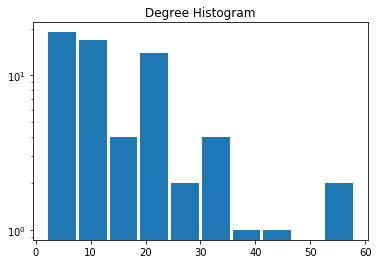

In [7]:
plt.hist(g.degree(), log=True, rwidth=0.9)
plt.title("Degree Histogram")
plt.show()

In [8]:
print(nodes_bound(g, 50, 'degree'))

Vertex with the highest  degree :
[('Mohamed Chaoui', 54), ('Jamal Zougam', 58)]


### Betweenness centrality

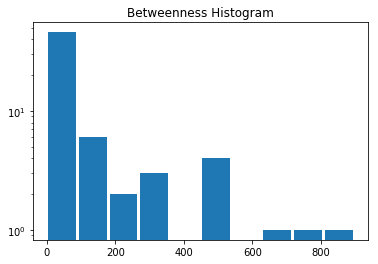

In [9]:
plt.hist(g.betweenness(), log=True, rwidth=0.9)
plt.title("Betweenness Histogram")
plt.show()

In [10]:
print(nodes_bound(g, 600, 'betweenness'))

Vertex with the highest  betweenness :
[('Mohamed Chaoui', 641.676), ('Jamal Zougam', 784.704), ('Semaan Gaby Eid', 897.04)]


### Closeness centrality

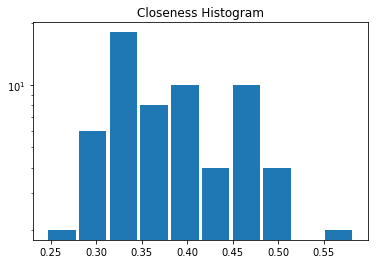

In [11]:
plt.hist(g.closeness(), log=True, rwidth=0.9)
plt.title("Closeness Histogram")
plt.show()

In [12]:
print(nodes_bound(g, 0.55, 'closeness'))

Vertex with the highest  closeness :
[('Mohamed Chaoui', 0.573), ('Jamal Zougam', 0.583)]


### Pagerank centrality

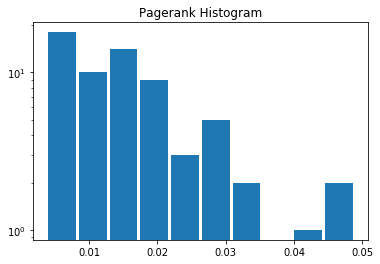

In [13]:
plt.hist(g.pagerank(), log=True, rwidth=0.9)
plt.title("Pagerank Histogram")
plt.show()

In [14]:
print(nodes_bound(g, 0.035, 'pagerank'))

Vertex with the highest  pagerank :
[('Imad Eddin Barakat', 0.04), ('Mohamed Chaoui', 0.045), ('Jamal Zougam', 0.049)]


### Eigenvector centrality

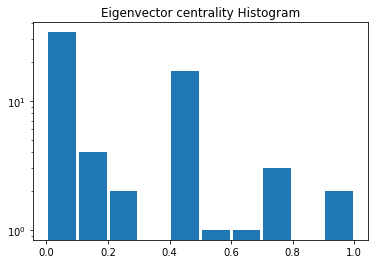

In [15]:
plt.hist(g.eigenvector_centrality(), log=True, rwidth=0.9)
plt.title("Eigenvector centrality Histogram")
plt.show()

In [16]:
print(nodes_bound(g, 0.8, 'eigenvector_centrality'))

Vertex with the highest  eigenvector_centrality :
[('Mohamed Chaoui', 0.972), ('Jamal Zougam', 1.0)]


## Community Detection

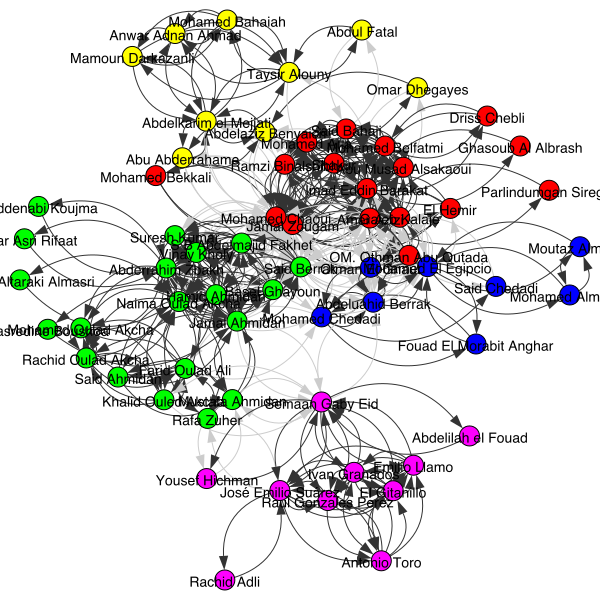

In [25]:
partition = g.community_optimal_modularity(weights=g.es["weight"])
ig.plot(partition)

In [26]:
partition.modularity

0.43768547859765483

In [27]:
partition.summary()

'Clustering with 64 elements and 5 clusters'

In [28]:
partition.sizes()

[17, 20, 8, 9, 10]

In [29]:
community_1 = partition[0]
community_2 = partition[1]
community_3 = partition[2]
community_4 = partition[3]
community_5 = partition[4]

print('\n', 'lunghezza community 1: ', len(community_1), 
      '\n', 'lunghezza community 2: ', len(community_2), 
      '\n', 'lunghezza community 3: ', len(community_3), 
      '\n', 'lunghezza community 4: ', len(community_4), 
      '\n', 'lunghezza community 5: ', len(community_5))


 lunghezza community 1:  17 
 lunghezza community 2:  20 
 lunghezza community 3:  8 
 lunghezza community 4:  9 
 lunghezza community 5:  10


In [30]:
sg1 = g.subgraph(community_1)
sg1["name"] = "sg1"
sg2 = g.subgraph(community_2)
sg2["name"] = "sg2"
sg3 = g.subgraph(community_3)
sg3["name"] = "sg3"
sg4 = g.subgraph(community_4)
sg4["name"] = "sg4"
sg5 = g.subgraph(community_5)
sg5["name"] = "sg5"

vc1 = sg1.vcount()
ec1 = sg1.ecount()

vc2 = sg2.vcount()
ec2 = sg2.ecount()

vc3 = sg3.vcount()
ec3 = sg3.ecount()

vc4 = sg4.vcount()
ec4 = sg4.ecount()

vc5 = sg5.vcount()
ec5 = sg5.ecount()

print('\n', 'Il sottografo 1 ha: {0} nodi, {1} archi.'.format(vc1, ec1), 
      '\n', 'Il sottografo 2 ha: {0} nodi, {1} archi.'.format(vc2, ec2), 
      '\n', 'Il sottografo 3 ha: {0} nodi, {1} archi.'.format(vc3, ec3), 
      '\n', 'Il sottografo 4 ha: {0} nodi, {1} archi.'.format(vc4, ec4), 
      '\n', 'Il sottografo 3 ha: {0} nodi, {1} archi.'.format(vc5, ec5))


 Il sottografo 1 ha: 17 nodi, 138 archi. 
 Il sottografo 2 ha: 20 nodi, 118 archi. 
 Il sottografo 3 ha: 8 nodi, 22 archi. 
 Il sottografo 4 ha: 9 nodi, 30 archi. 
 Il sottografo 3 ha: 10 nodi, 46 archi.


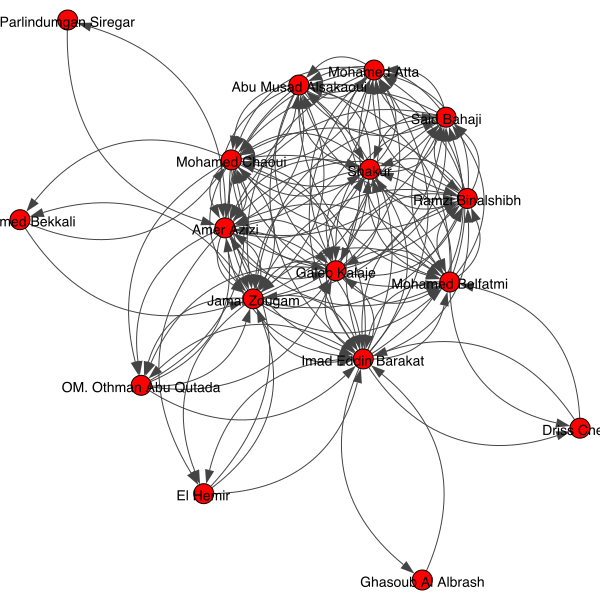

In [31]:
ig.plot(sg1)

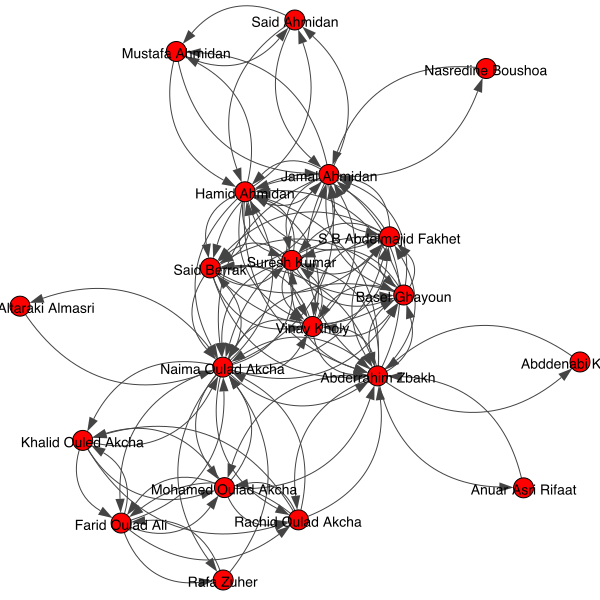

In [32]:
ig.plot(sg2)

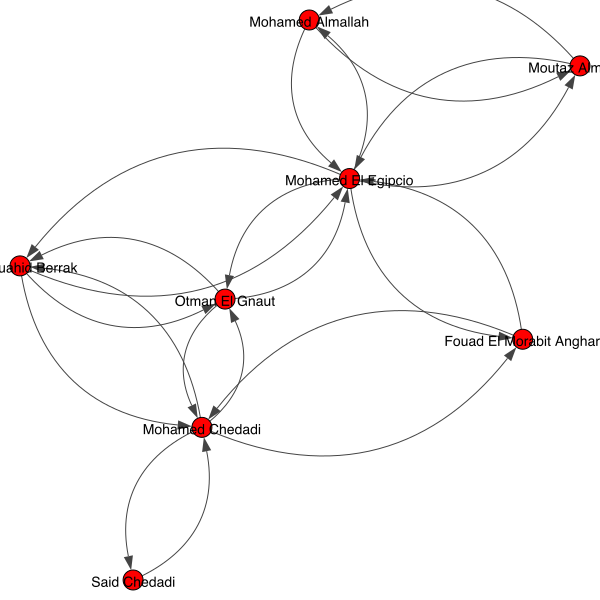

In [33]:
ig.plot(sg3)

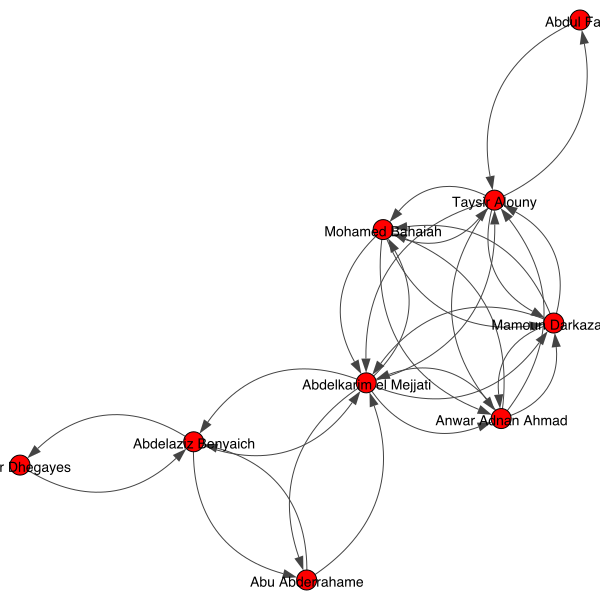

In [34]:
ig.plot(sg4)

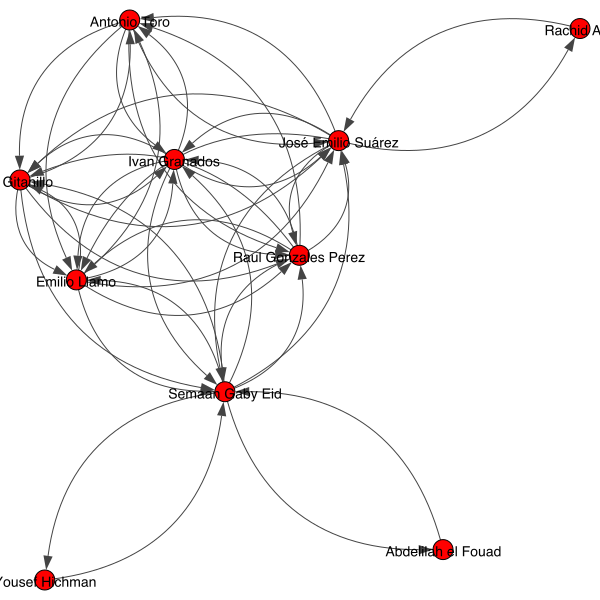

In [35]:
ig.plot(sg5)

## Community 1 - Centrality Analitycs

### Degree centrality

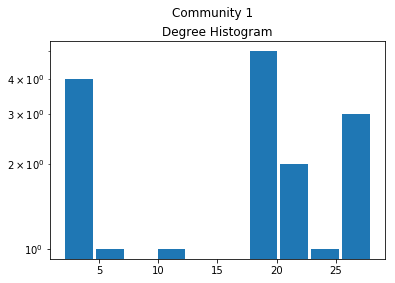

Vertex with the highest  degree :
[('Abu Musad Alsakaoui', 20), ('Mohamed Atta', 20), ('Ramzi Binalshibh', 20), ('Said Bahaji', 20), ('Shakur', 20), ('Mohamed Belfatmi', 22), ('Galeb Kalaje', 22), ('Mohamed Chaoui', 24), ('Jamal Zougam', 26), ('Amer Azizi', 26), ('Imad Eddin Barakat', 28)]


In [44]:
plt.hist(sg1.degree(), log=True, rwidth=0.9)
plt.title("Degree Histogram")
plt.suptitle("Community 1", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg1, 15, 'degree'))

### Betweenness centrality

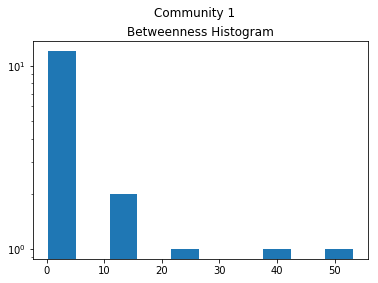

Vertex with the highest  betweenness :
[('Amer Azizi', 38.4), ('Imad Eddin Barakat', 53.4)]


In [45]:
plt.hist(sg1.betweenness(), log=True, rwidth=0.9)
plt.title("Betweenness Histogram")
plt.suptitle("Community 1", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg1, 35, 'betweenness'))

### Closeness centrality

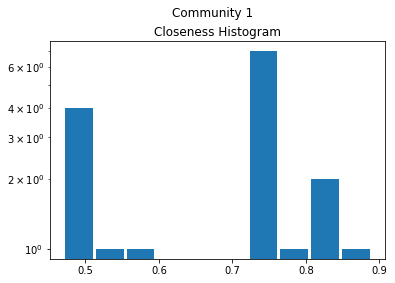

Vertex with the highest  closeness :
[('Abu Musad Alsakaoui', 0.727), ('Mohamed Atta', 0.727), ('Ramzi Binalshibh', 0.727), ('Said Bahaji', 0.727), ('Shakur', 0.727), ('Mohamed Belfatmi', 0.762), ('Galeb Kalaje', 0.762), ('Mohamed Chaoui', 0.8), ('Jamal Zougam', 0.842), ('Amer Azizi', 0.842), ('Imad Eddin Barakat', 0.889)]


In [46]:
plt.hist(sg1.closeness(), log=True, rwidth=0.9)
plt.title("Closeness Histogram")
plt.suptitle("Community 1", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg1, 0.7, 'closeness'))

### Pagerank centrality

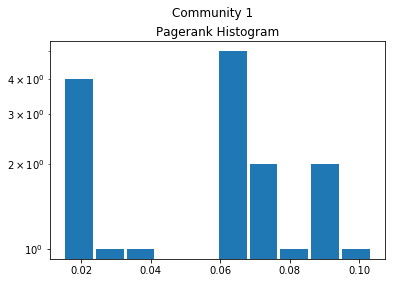

Vertex with the highest  pagerank :
[('Abu Musad Alsakaoui', 0.068), ('Mohamed Atta', 0.068), ('Ramzi Binalshibh', 0.068), ('Said Bahaji', 0.068), ('Shakur', 0.068), ('Galeb Kalaje', 0.074), ('Mohamed Belfatmi', 0.077), ('Mohamed Chaoui', 0.083), ('Jamal Zougam', 0.091), ('Amer Azizi', 0.095), ('Imad Eddin Barakat', 0.103)]


In [47]:
plt.hist(sg1.pagerank(), log=True, rwidth=0.9)
plt.title("Pagerank Histogram")
plt.suptitle("Community 1", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg1, 0.05, 'pagerank'))

### Eigenvector centrality

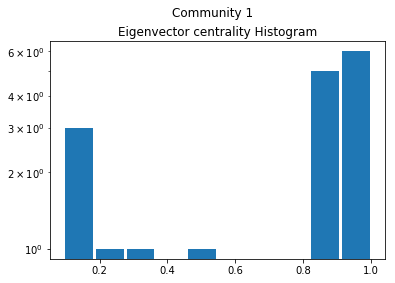

Vertex with the highest  eigenvector_centrality :
[('Abu Musad Alsakaoui', 0.909), ('Mohamed Atta', 0.909), ('Ramzi Binalshibh', 0.909), ('Said Bahaji', 0.909), ('Shakur', 0.909), ('Mohamed Belfatmi', 0.925), ('Galeb Kalaje', 0.95), ('Mohamed Chaoui', 0.967), ('Amer Azizi', 0.984), ('Jamal Zougam', 0.992), ('Imad Eddin Barakat', 1.0)]


In [48]:
plt.hist(sg1.eigenvector_centrality(), log=True, rwidth=0.9)
plt.title("Eigenvector centrality Histogram")
plt.suptitle("Community 1", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg1, 0.8, 'eigenvector_centrality'))

## Community 2 - Centrality Analitycs

### Degree centrality

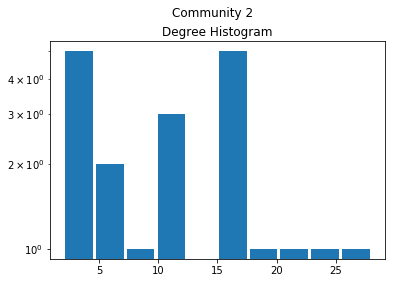

Vertex with the highest  degree :
[('Vinay Kholy', 16), ('Suresh Kumar', 16), ('Basel Ghayoun', 16), ('S B Abdelmajid Fakhet', 16), ('Said Berrak', 16), ('Hamid Ahmidan', 20), ('Jamal Ahmidan', 22), ('Abderrahim Zbakh', 24), ('Naima Oulad Akcha', 28)]


In [49]:
plt.hist(sg2.degree(), log=True, rwidth=0.9)
plt.title("Degree Histogram")
plt.suptitle("Community 2", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg2, 15, 'degree'))

### Betweenness centrality

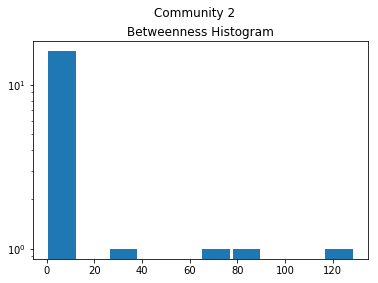

Vertex with the highest  betweenness :
[('Jamal Ahmidan', 66.0), ('Abderrahim Zbakh', 90.0), ('Naima Oulad Akcha', 129.0)]


In [51]:
plt.hist(sg2.betweenness(), log=True, rwidth=0.9)
plt.title("Betweenness Histogram")
plt.suptitle("Community 2", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg2, 60, 'betweenness'))

### Closeness centrality

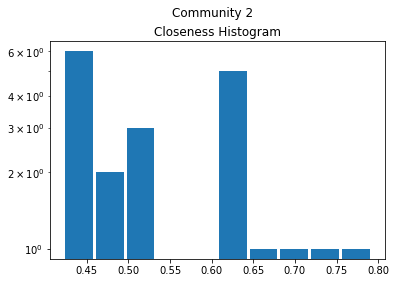

Vertex with the highest  closeness :
[('Vinay Kholy', 0.633), ('Suresh Kumar', 0.633), ('Basel Ghayoun', 0.633), ('S B Abdelmajid Fakhet', 0.633), ('Said Berrak', 0.633), ('Hamid Ahmidan', 0.679), ('Jamal Ahmidan', 0.704), ('Abderrahim Zbakh', 0.731), ('Naima Oulad Akcha', 0.792)]


In [52]:
plt.hist(sg2.closeness(), log=True, rwidth=0.9)
plt.title("Closeness Histogram")
plt.suptitle("Community 2", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg2, 0.60, 'closeness'))

### Pagerank centrality

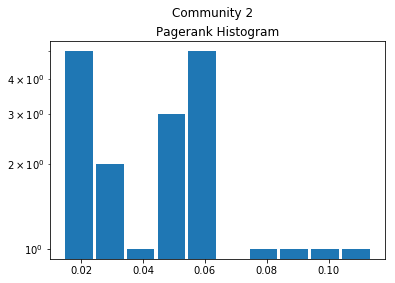

Vertex with the highest  pagerank :
[('Hamid Ahmidan', 0.077), ('Jamal Ahmidan', 0.089), ('Abderrahim Zbakh', 0.1), ('Naima Oulad Akcha', 0.114)]


In [53]:
plt.hist(sg2.pagerank(), log=True, rwidth=0.9)
plt.title("Pagerank Histogram")
plt.suptitle("Community 2", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg2, 0.07, 'pagerank'))

### Eigenvector centrality

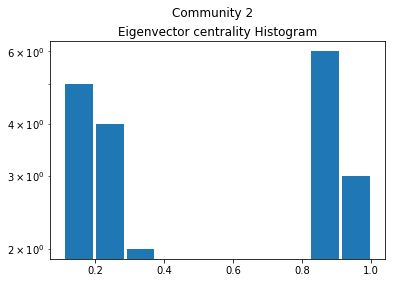

Vertex with the highest  eigenvector_centrality :
[('Vinay Kholy', 0.853), ('Suresh Kumar', 0.853), ('Basel Ghayoun', 0.853), ('S B Abdelmajid Fakhet', 0.853), ('Said Berrak', 0.853), ('Hamid Ahmidan', 0.906), ('Jamal Ahmidan', 0.917), ('Abderrahim Zbakh', 0.946), ('Naima Oulad Akcha', 1.0)]


In [54]:
plt.hist(sg2.eigenvector_centrality(), log=True, rwidth=0.9)
plt.title("Eigenvector centrality Histogram")
plt.suptitle("Community 2", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg2, 0.8, 'eigenvector_centrality'))

## Community 3 - Centrality Analitycs

### Degree centrality

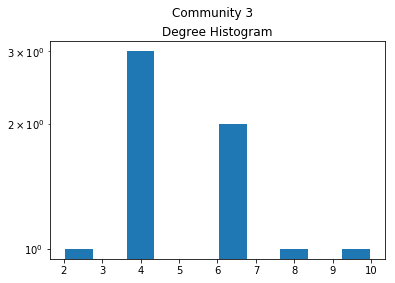

Vertex with the highest  degree :
[('Mohamed Chedadi', 8), ('Mohamed El Egipcio', 10)]


In [56]:
plt.hist(sg3.degree(), log=True, rwidth=0.9)
plt.title("Degree Histogram")
plt.suptitle("Community 3", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg3, 7, 'degree'))

### Betweenness centrality

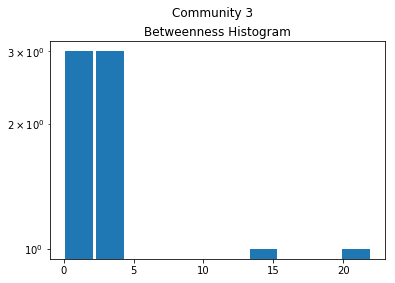

Vertex with the highest  betweenness :
[('Mohamed Chedadi', 14.0), ('Mohamed El Egipcio', 22.0)]


In [57]:
plt.hist(sg3.betweenness(), log=True, rwidth=0.9)
plt.title("Betweenness Histogram")
plt.suptitle("Community 3", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg3, 6, 'betweenness'))

### Closeness centrality

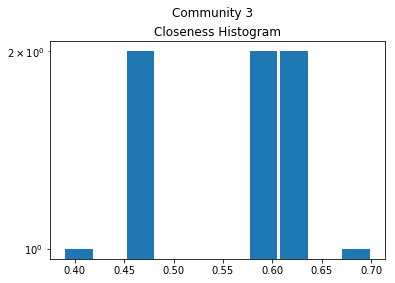

Vertex with the highest  closeness :
[('Mohamed Chedadi', 0.583), ('Fouad El Morabit Anghar', 0.583), ('Abdeluahid Berrak', 0.636), ('Otman El Gnaut', 0.636), ('Mohamed El Egipcio', 0.7)]


In [58]:
plt.hist(sg3.closeness(), log=True, rwidth=0.9)
plt.title("Closeness Histogram")
plt.suptitle("Community 3", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg3, 0.55, 'closeness'))

### Pagerank centrality

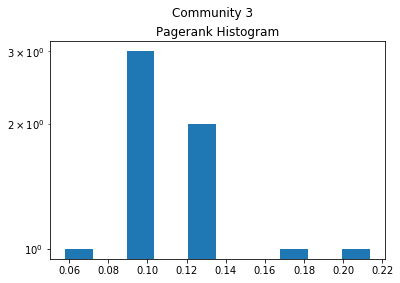

Vertex with the highest  pagerank :
[('Mohamed Chedadi', 0.181), ('Mohamed El Egipcio', 0.214)]


In [60]:
plt.hist(sg3.pagerank(), log=True, rwidth=0.9)
plt.title("Pagerank Histogram")
plt.suptitle("Community 3", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg3, 0.16, 'pagerank'))

### Eigenvector centrality

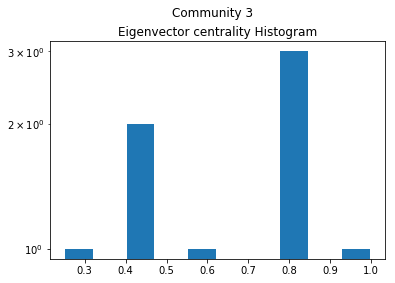

Vertex with the highest  eigenvector_centrality :
[('Mohamed Chedadi', 0.784), ('Abdeluahid Berrak', 0.829), ('Otman El Gnaut', 0.829), ('Mohamed El Egipcio', 1.0)]


In [61]:
plt.hist(sg3.eigenvector_centrality(), log=True, rwidth=0.9)
plt.title("Eigenvector centrality Histogram")
plt.suptitle("Community 3", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg3, 0.7, 'eigenvector_centrality'))

## Community 4 - Centrality Analitycs

### Degree centrality

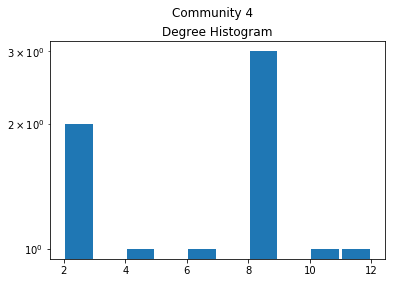

Vertex with the highest  degree :
[('Taysir Alouny', 10), ('Abdelkarim el Mejjati', 12)]


In [62]:
plt.hist(sg4.degree(), log=True, rwidth=0.9)
plt.title("Degree Histogram")
plt.suptitle("Community 4", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg4, 9, 'degree'))

### Betweenness centrality

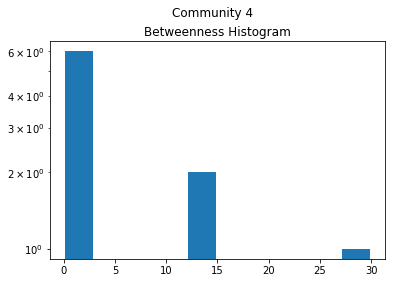

Vertex with the highest  betweenness :
[('Abdelkarim el Mejjati', 30.0)]


In [63]:
plt.hist(sg4.betweenness(), log=True, rwidth=0.9)
plt.title("Betweenness Histogram")
plt.suptitle("Community 4", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg4, 25, 'betweenness'))

### Closeness centrality

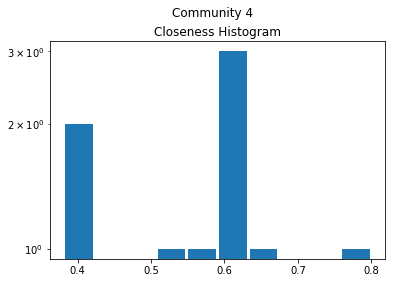

Vertex with the highest  closeness :
[('Abdelkarim el Mejjati', 0.8)]


In [65]:
plt.hist(sg4.closeness(), log=True, rwidth=0.9)
plt.title("Closeness Histogram")
plt.suptitle("Community 4", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg4, 0.75, 'closeness'))

### Pagerank centrality

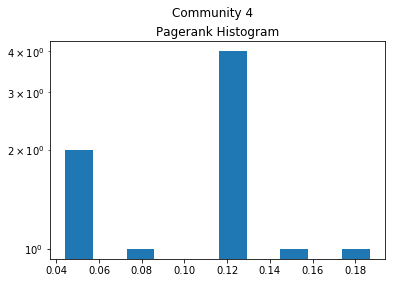

Vertex with the highest  pagerank :
[('Taysir Alouny', 0.158), ('Abdelkarim el Mejjati', 0.187)]


In [66]:
plt.hist(sg4.pagerank(), log=True, rwidth=0.9)
plt.title("Pagerank Histogram")
plt.suptitle("Community 4", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg4, 0.14, 'pagerank'))

### Eigenvector centrality

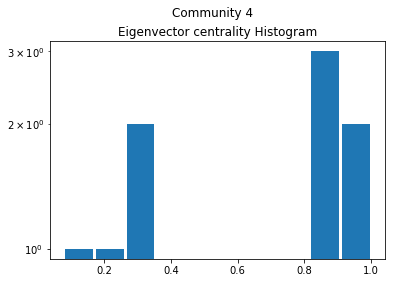

Vertex with the highest  eigenvector_centrality :
[('Anwar Adnan Ahmad', 0.875), ('Mamoun Darkazanli', 0.875), ('Mohamed Bahaiah', 0.875), ('Taysir Alouny', 0.917), ('Abdelkarim el Mejjati', 1.0)]


In [67]:
plt.hist(sg4.eigenvector_centrality(), log=True, rwidth=0.9)
plt.title("Eigenvector centrality Histogram")
plt.suptitle("Community 4", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg4, 0.8, 'eigenvector_centrality'))

## Community 5 - Centrality Analitycs

### Degree centrality

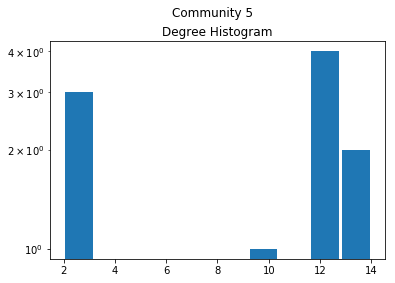

Vertex with the highest  degree :
[('Emilio Llamo', 12), ('Ivan Granados', 12), ('Raul Gonzales Perez', 12), ('El Gitanillo', 12), ('José Emilio Suárez', 14), ('Semaan Gaby Eid', 14)]


In [68]:
plt.hist(sg5.degree(), log=True, rwidth=0.9)
plt.title("Degree Histogram")
plt.suptitle("Community 5", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg5, 11, 'degree'))

### Betweenness centrality

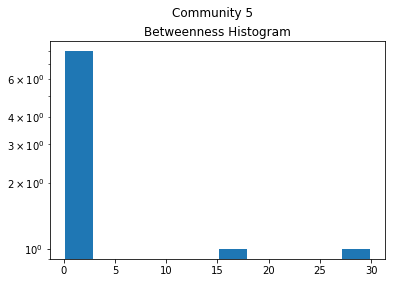

Vertex with the highest  betweenness :
[('José Emilio Suárez', 17.2), ('Semaan Gaby Eid', 30.0)]


In [70]:
plt.hist(sg5.betweenness(), log=True, rwidth=0.9)
plt.title("Betweenness Histogram")
plt.suptitle("Community 5", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg5, 15, 'betweenness'))

### Closeness centrality

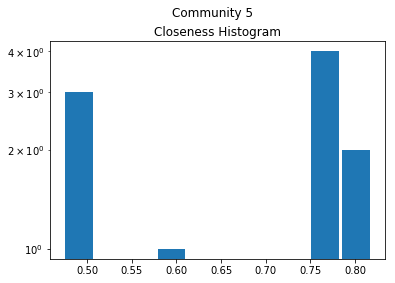

Vertex with the highest  closeness :
[('Emilio Llamo', 0.75), ('Ivan Granados', 0.75), ('Raul Gonzales Perez', 0.75), ('El Gitanillo', 0.75), ('José Emilio Suárez', 0.818), ('Semaan Gaby Eid', 0.818)]


In [71]:
plt.hist(sg5.closeness(), log=True, rwidth=0.9)
plt.title("Closeness Histogram")
plt.suptitle("Community 5", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg5, 0.70, 'closeness'))

### Pagerank centrality

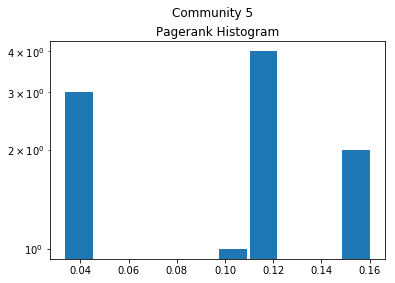

Vertex with the highest  pagerank :
[('José Emilio Suárez', 0.149), ('Semaan Gaby Eid', 0.161)]


In [72]:
plt.hist(sg5.pagerank(), log=True, rwidth=0.9)
plt.title("Pagerank Histogram")
plt.suptitle("Community 5", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg5, 0.14, 'pagerank'))

### Eigenvector centrality

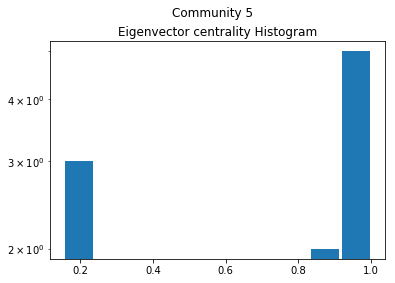

Vertex with the highest  eigenvector_centrality :
[('Antonio Toro', 0.843), ('Semaan Gaby Eid', 0.896), ('Emilio Llamo', 0.975), ('Ivan Granados', 0.975), ('Raul Gonzales Perez', 0.975), ('El Gitanillo', 0.975), ('José Emilio Suárez', 1.0)]


In [73]:
plt.hist(sg5.eigenvector_centrality(), log=True, rwidth=0.9)
plt.title("Eigenvector centrality Histogram")
plt.suptitle("Community 5", y=1.0, fontsize=12)
plt.show()

print(nodes_bound(sg5, 0.8, 'eigenvector_centrality'))

## Community Edge Betweenness 

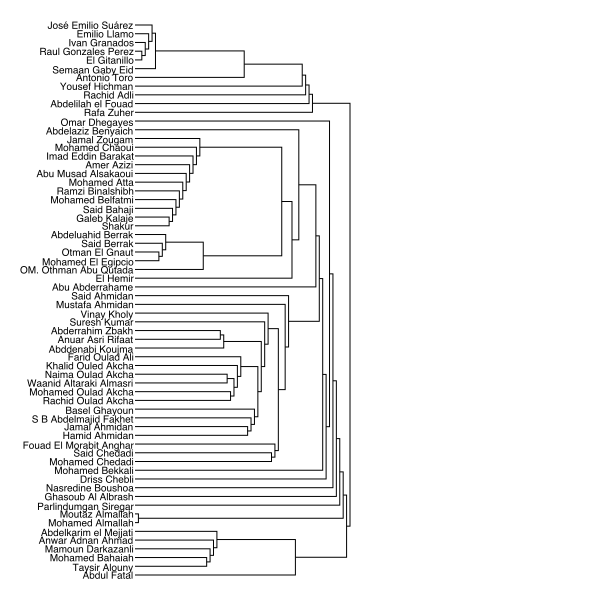

In [74]:
partition_edge = g.community_edge_betweenness(directed=True)
ig.plot(partition_edge)

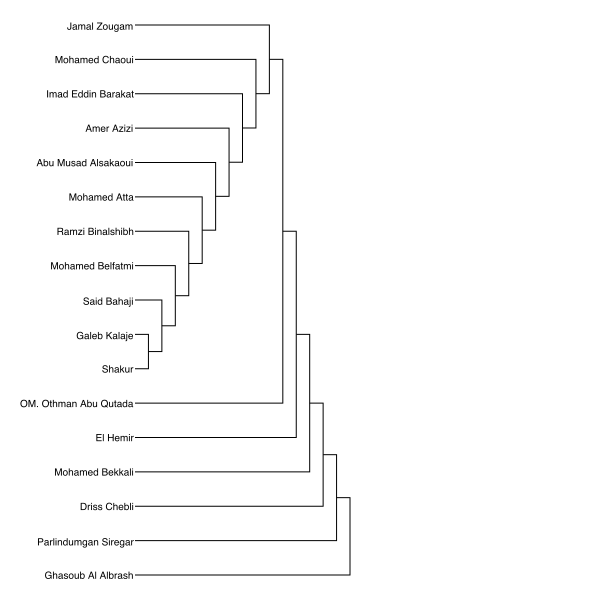

In [75]:
partition_edge_sg1 = sg1.community_edge_betweenness(directed=True)
ig.plot(partition_edge_sg1)

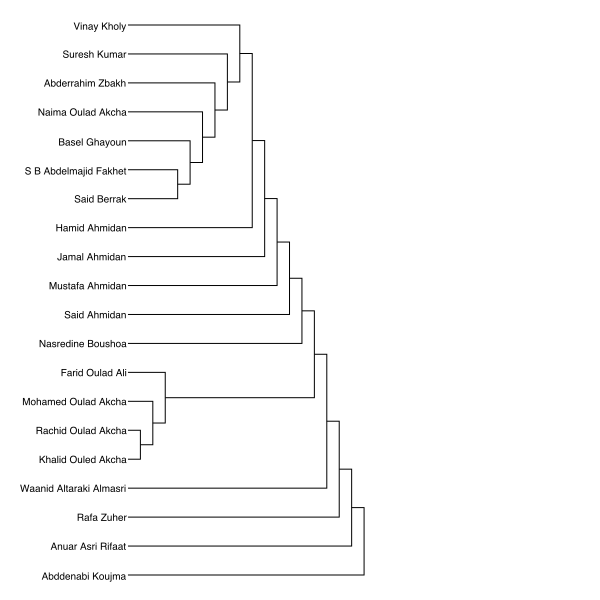

In [76]:
partition_edge_sg2 = sg2.community_edge_betweenness(directed=True)
ig.plot(partition_edge_sg2)


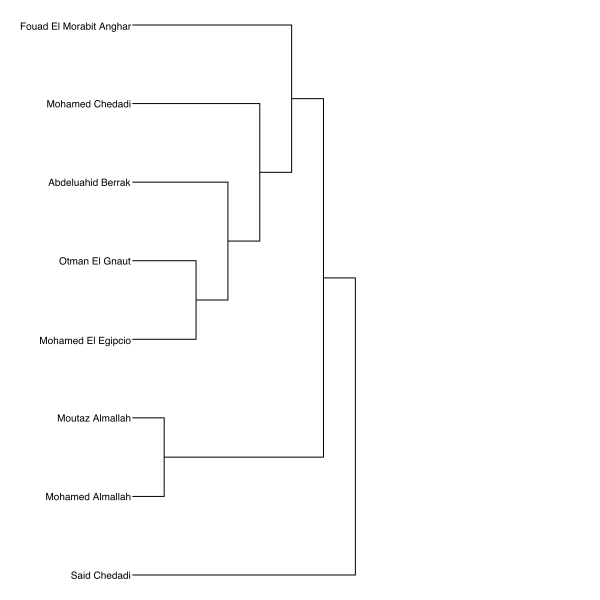

In [77]:
partition_edge_sg3 = sg3.community_edge_betweenness(directed=True)
ig.plot(partition_edge_sg3)

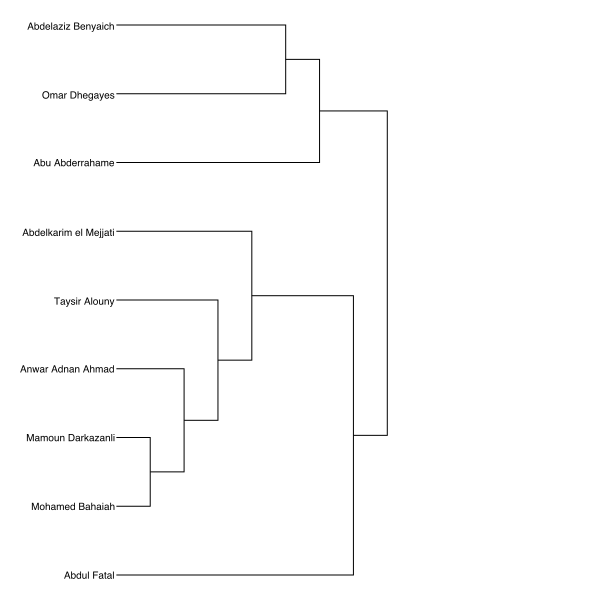

In [78]:
partition_edge_sg4 = sg4.community_edge_betweenness(directed=True)
ig.plot(partition_edge_sg4)

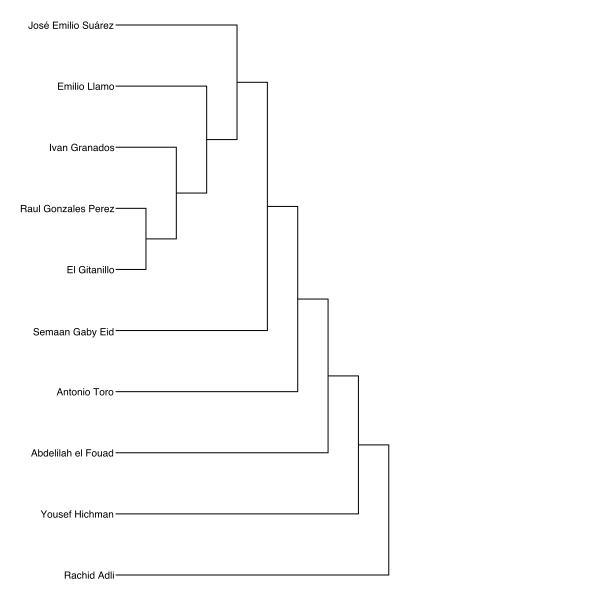

In [79]:
partition_edge_sg5 = sg5.community_edge_betweenness(directed=True)
ig.plot(partition_edge_sg5)

## Comparison of centrality measures

In [82]:
def ranking():
    label = g.vs['label']
    
    Degree = np.load('out/g/degree.npy')
    Betweenness = np.load('out/g/degree.npy')
    Closeness = np.load('out/g/degree.npy')
    Pagerank = np.load('out/g/degree.npy')
    Eigenvector = np.load('out/g/degree.npy')
    
    ranking_Degree = list()
    ranking_Betweenness = list()
    ranking_Closeness = list()
    ranking_Pagerank = list()
    ranking_Eigenvector = list()
    
    for i in range (len(label)):
        ranking_Degree.append((label[i], Degree[i]))
        ranking_Betweenness.append((label[i], Betweenness[i]))
        ranking_Closeness.append((label[i], Closeness[i]))
        ranking_Pagerank.append((label[i], Pagerank[i]))
        ranking_Eigenvector.append((label[i], Eigenvector[i]))
        
    ranking_Degree = sorted(ranking_Degree, key = lambda x: float(x[1]), reverse=True)
    ranking_Betweenness = sorted(ranking_Betweenness, key = lambda x: float(x[1]), reverse=True)
    ranking_Closeness = sorted(ranking_Closeness, key = lambda x: float(x[1]), reverse=True)
    ranking_Pagerank = sorted(ranking_Pagerank, key = lambda x: float(x[1]), reverse=True)
    ranking_Eigenvector = sorted(ranking_Eigenvector, key = lambda x: float(x[1]), reverse=True)
    
    return ranking_Degree[:5], ranking_Betweenness[:5], ranking_Closeness[:5], ranking_Pagerank[:5], ranking_Eigenvector[:5]
    

def print_comparison_table ():
    
    ranking_Degree, ranking_Betweenness, ranking_Closeness, ranking_Pagerank, ranking_Eigenvector = ranking()
    
    print('Degree'.ljust(20) + 'Betweenness'.ljust(20) + 'Closeness'.ljust(20) + 'Pagerank'.ljust(20) + 'Eigenvector')
    print('\n')
    print(ranking_Degree[0][0].ljust(20) + ranking_Betweenness[0][0].ljust(20) + ranking_Closeness[0][0].ljust(20) + ranking_Pagerank[0][0].ljust(20) + ranking_Eigenvector[0][0])
    print(ranking_Degree[1][0].ljust(20) + ranking_Betweenness[1][0].ljust(20) + ranking_Closeness[1][0].ljust(20) + ranking_Pagerank[1][0].ljust(20) + ranking_Eigenvector[1][0])
    print(ranking_Degree[2][0].ljust(20) + ranking_Betweenness[2][0].ljust(20) + ranking_Closeness[2][0].ljust(20) + ranking_Pagerank[2][0].ljust(20) + ranking_Eigenvector[2][0])
    print(ranking_Degree[3][0].ljust(20) + ranking_Betweenness[3][0].ljust(20) + ranking_Closeness[3][0].ljust(20) + ranking_Pagerank[3][0].ljust(20) + ranking_Eigenvector[3][0])
    print(ranking_Degree[4][0].ljust(20) + ranking_Betweenness[4][0].ljust(20) + ranking_Closeness[4][0].ljust(20) + ranking_Pagerank[4][0].ljust(20) + ranking_Eigenvector[4][0])
    
    

In [83]:
print_comparison_table()

Degree              Betweenness         Closeness           Pagerank            Eigenvector


Jamal Zougam        Jamal Zougam        Jamal Zougam        Jamal Zougam        Jamal Zougam
Mohamed Chaoui      Mohamed Chaoui      Mohamed Chaoui      Mohamed Chaoui      Mohamed Chaoui
Imad Eddin Barakat  Imad Eddin Barakat  Imad Eddin Barakat  Imad Eddin Barakat  Imad Eddin Barakat
Amer Azizi          Amer Azizi          Amer Azizi          Amer Azizi          Amer Azizi
Said Berrak         Said Berrak         Said Berrak         Said Berrak         Said Berrak
